## Problem Statement:

### EMAIL SPAM DETECTION WITH MACHINE LEARNING (Naive Bayes algorithm and NLP)
n
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing cont
.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and  lets gets started.et
start


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

## 1. Data collection

In [30]:
file_path = 'spam.csv'
encoding = 'utf-8'  # Adjust the encoding

# Read the file line by line and handle decoding errors
lines = []
with open(file_path, 'r', encoding=encoding, errors='replace') as file:
    for line in file:
        lines.append(line)

# Join the lines into a string and read with Pandas
df = pd.read_csv(io.StringIO(''.join(lines)))

# Now 'data' contains the CSV data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 2. Data preprocessing, cleaning

In [31]:
df.shape

(5572, 5)

In [32]:
# check for null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [33]:
# drop cols that are independent or not relevant for our prediction
unwanted_cols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df = df.drop(columns = unwanted_cols)

# look now how it was ?
df.head() # valid right !...

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# its like counting values group by v1 column [aggregation]
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [47]:
df['v2'].value_counts() 

v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                   

In [46]:
# describe [talented python]
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## 3. Data visualization

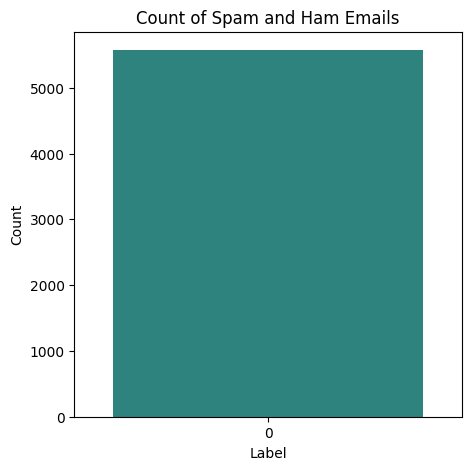

In [74]:
# create a label that 1 for spam and 0 for ham
df['label'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

# Visualization using count plot for 'spam' and 'ham' counts
plt.figure(figsize=(5, 5))
sns.countplot(df['label'], palette='viridis')  # Using a color palette for better visualization
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Spam and Ham Emails')
plt.show()


## 4. Text Preprocessing

In [77]:
# Text preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
import nltk

In [78]:
# Download stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

stop_words

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [80]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['processed_text'] = df['v2'].apply(preprocess_text)

df.head()

,v1,v2,label,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


## 5. train, test split

In [82]:
# Split the data
X = df['processed_text'] # feature
y = df['label'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1 Model training (Naive Bayes Classifier)


In [86]:
# Feature extraction using Count Vectorization

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, y_train)

MultinomialNB()

### 5.2 Model Evaluation

In [84]:
# Predictions
y_pred = nb_classifier.predict(X_test_count)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9802690582959641
Confusion Matrix:
 [[961   4]
 [ 18 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 5.3 Model testing

In [85]:
# Example prediction for new data
new_emails = ['Win a free iPhone now!', 'Meeting scheduled for tomorrow']
new_emails_processed = [preprocess_text(email) for email in new_emails]
new_emails_count = vectorizer.transform(new_emails_processed)
predictions = nb_classifier.predict(new_emails_count)

print("Predictions for new emails:")
for i, email in enumerate(new_emails):
    print(f"Email: {email}, Predicted label: {'spam' if predictions[i] == 1 else 'ham'}")


Predictions for new emails:
Email: Win a free iPhone now!, Predicted label: spam
Email: Meeting scheduled for tomorrow, Predicted label: ham


## 6. Conclusion

By preprocessing the data, training the model, and evaluating its performance, we were able to classify emails into spam and non-spam categories with a certain level of accuracy.

In conclusion, we successfully built an email spam detection system using the Naive Bayes algorithm.